load the dataset and look out it

In [ ]:
import pandas as pd
df = pd.read_csv(r'A:\fmodel\Auto_Insurance_Fraud_Claims_File01.csv')
print(df.shape)
print(df.columns)
print(df.dtypes)
df.head()

(40000, 53)
Index(['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured',
       'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date',
       'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit',
       'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies',
       'Insured_Relationship', 'Capital_Gains', 'Capital_Loss',
       'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type',
       'Accident_Severity', 'authorities_contacted', 'Acccident_State',
       'Acccident_City', 'Accident_Location', 'Accident_Hour',
       'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries',
       'Witnesses', 'Police_Report', 'DL_Expiry_Date', 'Claims_Date',
       'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Color', 'Vehicle_Cost',
       'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Fraud_Ind',
       'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim',
       'Vehicle_Claim', 'Vehicle_Registr

,Claim_ID,Bind_Date1,Customer_Life_Value1,Age_Insured,Policy_Num,Policy_State,Policy_Start_Date,Policy_Expiry_Date,Policy_BI,Policy_Ded,...,DiffIN_Mileage,Low_Mileage_Discount,Fraud_Ind,Commute_Discount,Total_Claim,Injury_Claim,Property_Claim,Vehicle_Claim,Vehicle_Registration,Check_Point
0,AA00000001,1/1/2023,12,28,123790687,OH,10/13/2023,4/13/2024,500/1000,1000,...,2499,0,N,0,6162.56,714.94,5370.74,76.88,IF47V1395,No
1,AA00000002,1/1/2023,12,31,129044473,IL,10/21/2023,4/21/2024,250/500,500,...,4242,1,N,0,20402.38,7669.31,5708.22,7024.85,EI51L7783,No
2,AA00000003,7/1/2022,18,50,146863149,OH,11/26/2023,5/26/2024,500/1000,500,...,2346,0,N,0,10839.12,3646.11,3468.94,3724.07,MU37B8905,No
3,AA00000004,1/1/2023,12,37,163100869,IL,8/8/2023,2/8/2024,500/1000,1000,...,2425,0,Y,0,17423.88,5585.62,1863.46,9974.80,RI52Q2108,No
4,AA00000005,3/1/2022,22,28,185582958,OH,11/12/2023,5/12/2024,250/500,1000,...,3890,1,N,0,24527.38,7224.79,3074.12,14228.47,UX39O9355,No


Proforming EDA operation ( small data analysis )

Dataset Shape: (40000, 53)

 Column Data Types:
 Claim_ID                     object
Bind_Date1                   object
Customer_Life_Value1          int64
Age_Insured                   int64
Policy_Num                    int64
Policy_State                 object
Policy_Start_Date            object
Policy_Expiry_Date           object
Policy_BI                    object
Policy_Ded                    int64
Policy_Premium              float64
Umbrella_Limit                int64
Insured_Zip                   int64
Gender                       object
Education                    object
Occupation                   object
Hobbies                      object
Insured_Relationship         object
Capital_Gains                 int64
Capital_Loss                  int64
Garage_Location              object
Accident_Date                object
Accident_Type                object
Collision_Type               object
Accident_Severity            object
authorities_contacted        object
Acccident_State

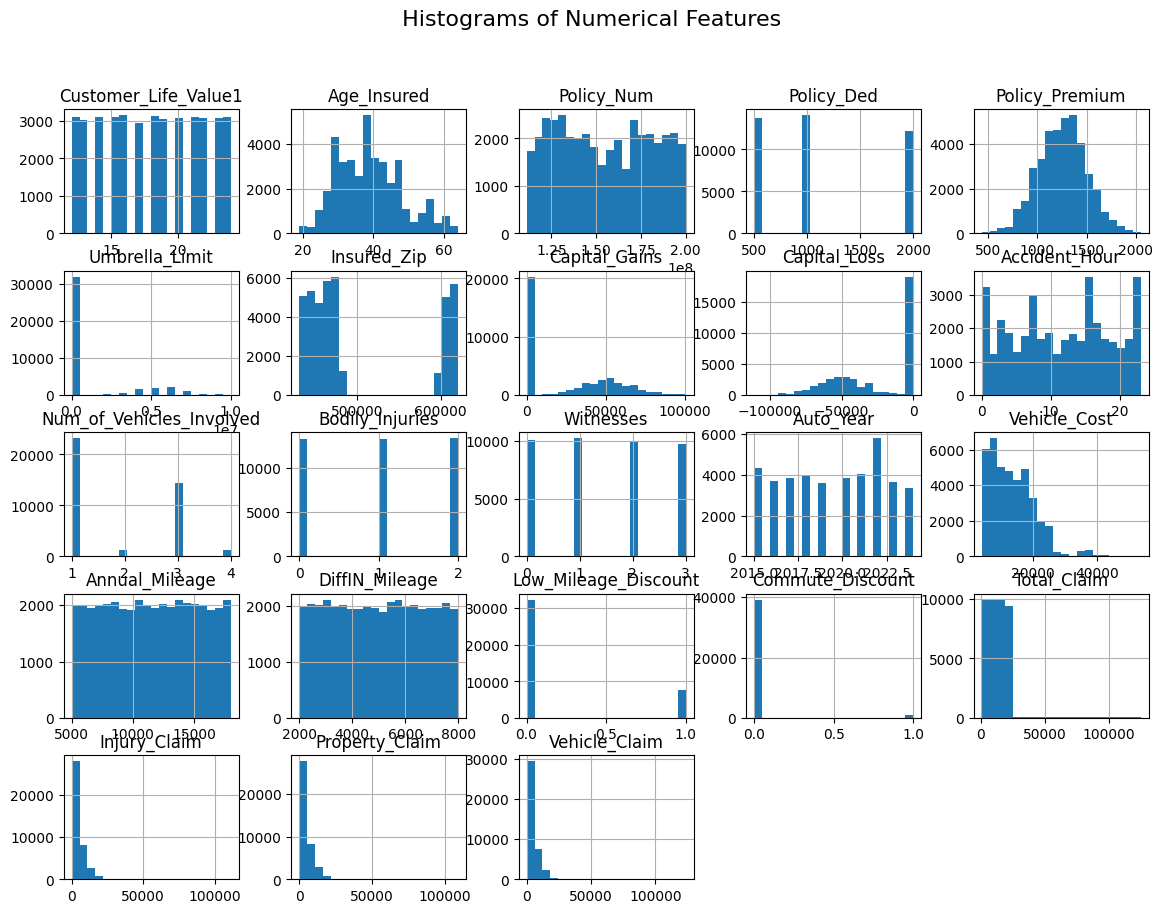

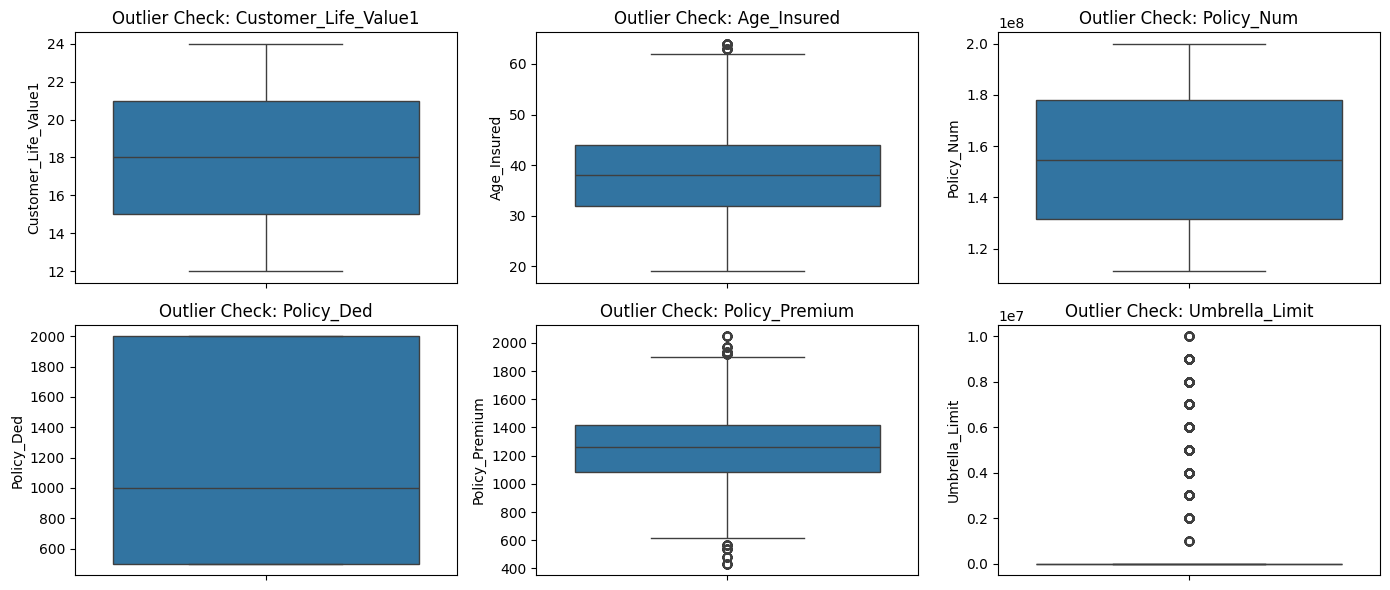

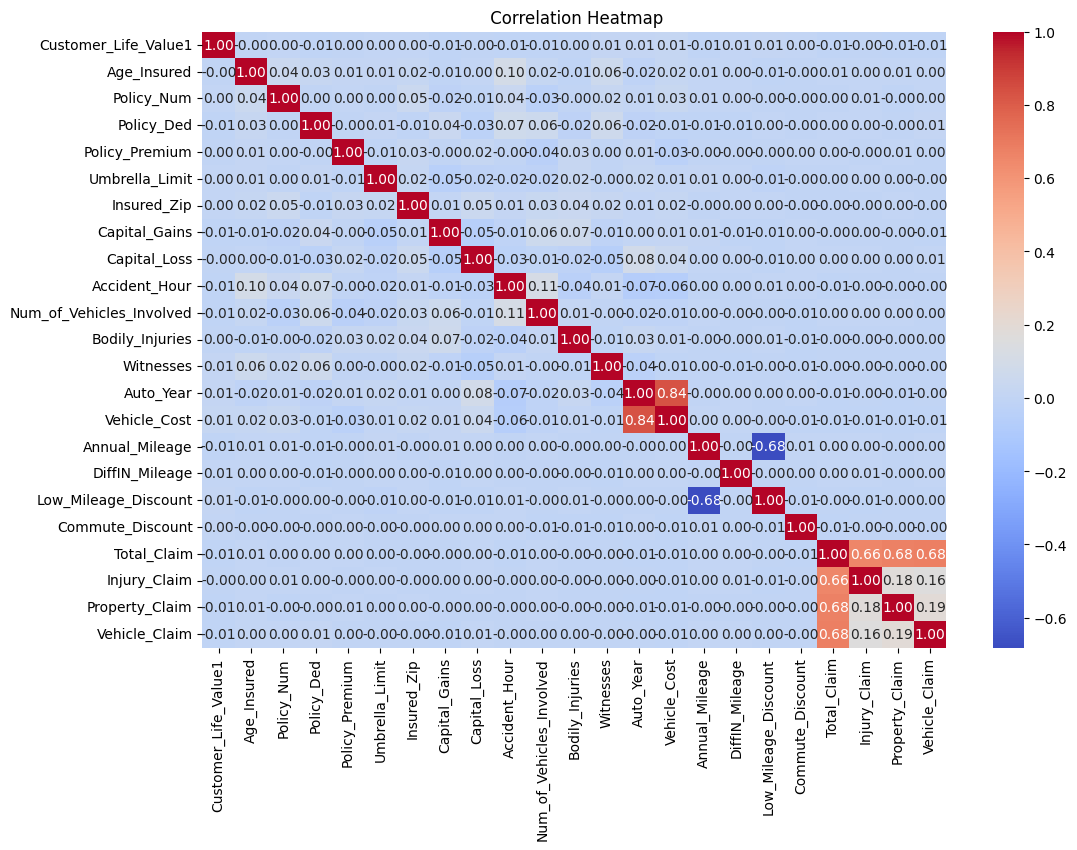

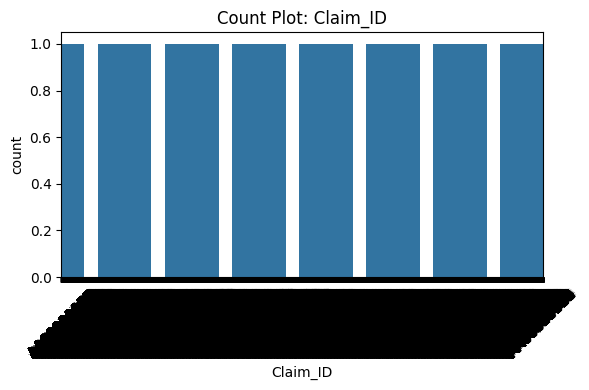

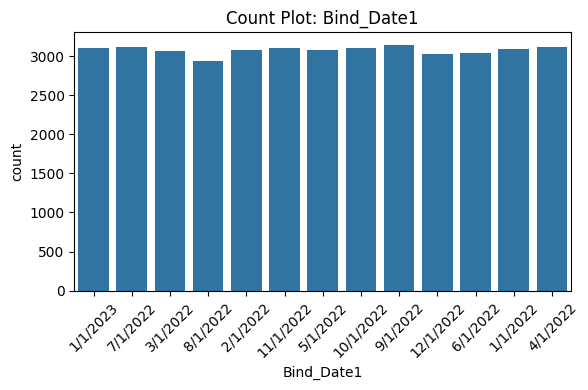

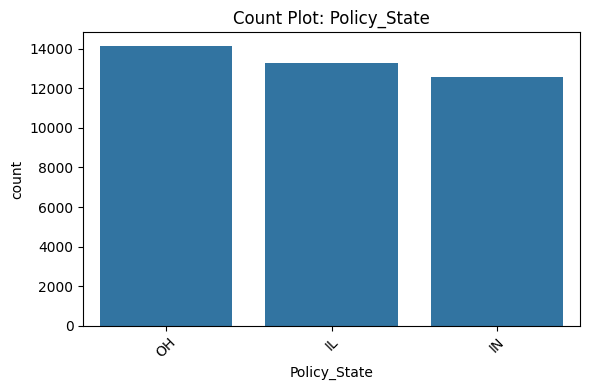

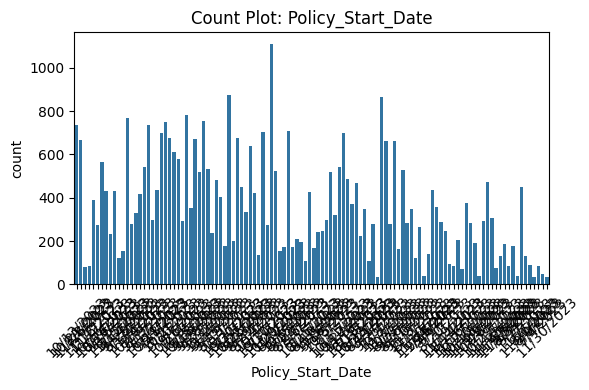

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('A:\leran 4.0 model\Auto_Insurance_Fraud_Claims_File01.csv')
print("Dataset Shape:", df.shape)
print("\n Column Data Types:\n", df.dtypes)
print("\n First 5 Rows:\n", df.head())

print("\n Missing Values:\n", df.isnull().sum())

print("\nStatistical Summary (Numerical):\n", df.describe())

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n Value Counts for '{col}':")
    print(df[col].value_counts())

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle(' Histograms of Numerical Features', fontsize=16)
plt.show()

plt.figure(figsize=(14, 6))
for i, col in enumerate(num_cols[:6], 1):  
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier Check: {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title(' Correlation Heatmap')
plt.show()

for col in cat_cols[:4]:  
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot: {col}')
    plt.tight_layout()
    plt.show()


 Missing Value Handling using KNNImputer

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
knn_imputer = KNNImputer(n_neighbors=5)
df[num_cols] = knn_imputer.fit_transform(df[num_cols])
print(" Missing value imputation completed.")
print("Remaining missing values per column:\n", df.isnull().sum())
print("\n🔍 Sample of cleaned data:\n", df.head(3))


 Missing value imputation completed.
Remaining missing values per column:
 Claim_ID                    0
Bind_Date1                  0
Customer_Life_Value1        0
Age_Insured                 0
Policy_Num                  0
Policy_State                0
Policy_Start_Date           0
Policy_Expiry_Date          0
Policy_BI                   0
Policy_Ded                  0
Policy_Premium              0
Umbrella_Limit              0
Insured_Zip                 0
Gender                      0
Education                   0
Occupation                  0
Hobbies                     0
Insured_Relationship        0
Capital_Gains               0
Capital_Loss                0
Garage_Location             0
Accident_Date               0
Accident_Type               0
Collision_Type              0
Accident_Severity           0
authorities_contacted       0
Acccident_State             0
Acccident_City              0
Accident_Location           0
Accident_Hour               0
Num_of_Vehicles_Involved 

Encoding Hybrid Encoding (OneHotEncoder with TargetEncoder )

In [7]:
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

cat_cols = df.select_dtypes(include='object').columns.drop('Fraud_Ind', errors='ignore')

low_cardinality = [col for col in cat_cols if df[col].nunique() <= 10]
high_cardinality = [col for col in cat_cols if df[col].nunique() > 10]

print("📦 Low Cardinality Columns for OneHotEncoding:", low_cardinality)
print("📦 High Cardinality Columns for TargetEncoding:", high_cardinality)

onehot = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
df_onehot = pd.DataFrame(onehot.fit_transform(df[low_cardinality]),
                         columns=onehot.get_feature_names_out(low_cardinality),
                         index=df.index)

target_encoder = ce.TargetEncoder(cols=high_cardinality)
df_target_encoded = target_encoder.fit_transform(df[high_cardinality], df['Fraud_Ind'])

remaining_cols = df.drop(columns=low_cardinality + high_cardinality + ['Fraud_Ind'])

df_encoded = pd.concat([remaining_cols.reset_index(drop=True),
                        df_onehot.reset_index(drop=True),
                        df_target_encoded.reset_index(drop=True)],
                       axis=1)

df_encoded['Fraud_Ind'] = df['Fraud_Ind'].reset_index(drop=True)

print("\n Hybrid Encoding Completed")
print("Final shape:", df_encoded.shape)
df_encoded.head(3)


📦 Low Cardinality Columns for OneHotEncoding: ['Policy_State', 'Policy_BI', 'Gender', 'Education', 'Insured_Relationship', 'Garage_Location', 'Accident_Type', 'Collision_Type', 'Accident_Severity', 'authorities_contacted', 'Acccident_State', 'Acccident_City', 'Property_Damage', 'Police_Report', 'Vehicle_Color', 'Check_Point']
📦 High Cardinality Columns for TargetEncoding: ['Claim_ID', 'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Occupation', 'Hobbies', 'Accident_Date', 'Accident_Location', 'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Vehicle_Registration']

 Hybrid Encoding Completed
Final shape: (40000, 86)


,Customer_Life_Value1,Age_Insured,Policy_Num,Policy_Ded,Policy_Premium,Umbrella_Limit,Insured_Zip,Capital_Gains,Capital_Loss,Accident_Hour,...,Occupation,Hobbies,Accident_Date,Accident_Location,DL_Expiry_Date,Claims_Date,Auto_Make,Auto_Model,Vehicle_Registration,Fraud_Ind
0,-1.601757,-1.198198,-1.200901,-0.221188,-1.096695,-0.479633,-0.400156,1.354015,0.952504,-0.091377,...,0.166406,0.270758,0.251524,0.035037,5.597464e-08,0.220145,0.239629,0.139952,0.214863,N
1,-1.601757,-0.869785,-0.998829,-1.039419,-0.375026,-0.479633,1.442688,0.453411,0.952504,1.347177,...,0.224306,0.152436,0.262187,0.035037,7.455488e-04,0.107884,0.312847,0.358911,0.214863,N
2,0.000194,1.210163,-0.313482,-1.039419,-1.493144,-0.479633,-0.585494,-0.904699,0.952504,0.340189,...,0.175671,0.308251,0.162162,0.017077,1.707719e-02,0.156812,0.312847,0.275353,0.214863,N


feature engineering 

In [ ]:
import pandas as pd
import numpy as np

date_cols = ['Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Accident_Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df['Policy_Duration'] = (df['Policy_Expiry_Date'] - df['Policy_Start_Date']).dt.days
df['Days_Since_Bind'] = (df['Accident_Date'] - df['Bind_Date1']).dt.days
df['Accident_Month'] = df['Accident_Date'].dt.month
df['Accident_Weekday'] = df['Accident_Date'].dt.weekday

df['Claim_to_Premium'] = df['Vehicle_Claim'] / (df['Policy_Premium'] + 1e-5)

threshold = df['Customer_Life_Value1'].quantile(0.90)
df['High_Value_Customer'] = (df['Customer_Life_Value1'] >= threshold).astype(int)

df['Risk_Region'] = df['Policy_State'].astype(str) + "_" + df['Accident_Type'].astype(str)
df['Gender_Occ_Combo'] = df['Gender'].astype(str) + "_" + df['Occupation'].astype(str)

from sklearn.preprocessing import LabelEncoder

for new_col in ['Risk_Region', 'Gender_Occ_Combo']:
    le = LabelEncoder()
    df[new_col] = le.fit_transform(df[new_col])

print("\n[INFO] Sample of engineered features:")
print(df[['Policy_Duration', 'Days_Since_Bind', 'Claim_to_Premium', 'High_Value_Customer', 'Risk_Region', 'Gender_Occ_Combo']].head())



[INFO] Sample of engineered features:
   Policy_Duration  Days_Since_Bind  Claim_to_Premium  High_Value_Customer  \
0              183              411          0.701575                    0   
1              183              416         -1.059482                    0   
2              182              605          0.105119                    0   
3              184              373         -1.123409                    0   
4              182              718        -18.958809                    0   

   Risk_Region  Gender_Occ_Combo  
0           10                 0  
1            0                24  
2            8                 8  
3            2                26  
4            8                17  


 outlier scores as a feature

In [9]:
from sklearn.ensemble import IsolationForest
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Outlier_Score'] = iso_forest.fit_predict(df[num_cols])
df['Is_Outlier'] = (df['Outlier_Score'] == -1).astype(int)
print(df[['Outlier_Score', 'Is_Outlier']].head())


   Outlier_Score  Is_Outlier
0              1           0
1              1           0
2              1           0
3              1           0
4              1           0


Split and save train/test data

In [10]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Fraud_Ind', axis=1)
y = df_encoded['Fraud_Ind']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  
)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
# Save to CSV files
train_df.to_csv("auto_fraud_train.csv", index=False)
test_df.to_csv("auto_fraud_test.csv", index=False)

print(" Data splitting and saving completed.")
print("Train set shape:", train_df.shape)
print("Test set shape :", test_df.shape)


 Data splitting and saving completed.
Train set shape: (32000, 86)
Test set shape : (8000, 86)


In [12]:
print(df.columns.tolist())


['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured', 'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit', 'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies', 'Insured_Relationship', 'Capital_Gains', 'Capital_Loss', 'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type', 'Accident_Severity', 'authorities_contacted', 'Acccident_State', 'Acccident_City', 'Accident_Location', 'Accident_Hour', 'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries', 'Witnesses', 'Police_Report', 'DL_Expiry_Date', 'Claims_Date', 'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Color', 'Vehicle_Cost', 'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Fraud_Ind', 'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim', 'Vehicle_Claim', 'Vehicle_Registration', 'Check_Point', 'Policy_Duration', 'Days_Since_Bind', 'Accident_Month', 'Accident_Weekday', 'Claim_to_

FEATUR SELECTION USING  OPTIMIZATION tecchnique Using RFECV

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

y_train = y_train.map({'Y': 1, 'N': 0})
y_test = y_test.map({'Y': 1, 'N': 0})
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

rfecv = RFECV(
    estimator=gb_model,
    step=1,
    cv=StratifiedKFold(5),
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

rfecv.fit(X_train, y_train)

selected_features = X_train.columns[rfecv.support_]
print("\n✅ RFECV Selected Features:")
print(selected_features.tolist())
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 fe

feature  selection using Tree-Based + SHAP + Mutual Info for better real-world insight

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7904, number of negative: 24096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3959
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247000 -> initscore=-1.114677
[LightGBM] [Info] Start training from score -1.114677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

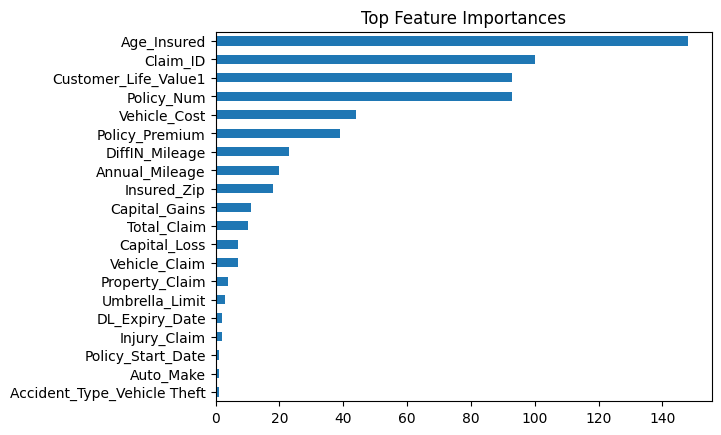

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X_train.columns)
selected_features = importances[importances > threshold].index.tolist()  
import matplotlib.pyplot as plt
importances.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from lightgbm import LGBMClassifier
import pandas as pd
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X_train.columns)
threshold = 20 
selected_features = importances[importances > threshold].index.tolist()
print("✅ Selected Features (Importance > 20):")
print(selected_features)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7904, number of negative: 24096
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3959
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 85
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247000 -> initscore=-1.114677
[LightGBM] [Info] Start training from score -1.114677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

SMOTE addition 

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter
selected_features = ['Accident_Location', 'Vehicle_Registration', 'Claim_ID']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
print("Original Class Distribution:")
print(Counter(y_train))
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)
print("\n After SMOTE - Resampled Class Distribution:")
print(Counter(y_train_resampled))


Original Class Distribution:
Counter({0: 24096, 1: 7904})

 After SMOTE - Resampled Class Distribution:
Counter({0: 24096, 1: 24096})


Model building using Tree based classifiers

model -1

RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [ ]:
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             precision_score, recall_score, f1_score, roc_auc_score,
                             mean_squared_error, mean_absolute_error, cohen_kappa_score,
                             log_loss, balanced_accuracy_score, r2_score)

import numpy as np
y_pred_rf = rf_model.predict(X_test_sel)
y_proba_rf = rf_model.predict_proba(X_test_sel)[:, 1]
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\n Classification Report:")
print(classification_report(y_test, y_pred_rf))

print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"✅ Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"✅ Recall (Sensitivity): {recall_score(y_test, y_pred_rf):.4f}")
print(f"✅ Specificity: {recall_score(y_test, y_pred_rf, pos_label=0):.4f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"✅ ROC AUC: {roc_auc_score(y_test, y_proba_rf):.4f}")
print(f"✅ Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_rf):.4f}")
print(f"✅ Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_rf):.4f}")
print(f"✅ Log Loss: {log_loss(y_test, y_proba_rf):.4f}")
print(f"✅ Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"✅ Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"✅ R-squared (R²): {r2_score(y_test, y_pred_rf):.4f}")


📊 Confusion Matrix:
[[4540  279]
 [   0 1581]]

📈 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      4819
           1       0.85      1.00      0.92      1581

    accuracy                           0.96      6400
   macro avg       0.93      0.97      0.94      6400
weighted avg       0.96      0.96      0.96      6400

🎯 Accuracy: 0.9564
✅ Precision: 0.8500
✅ Recall (Sensitivity): 1.0000
✅ Specificity: 0.9421
✅ F1-Score: 0.9189
✅ ROC AUC: 0.9991
✅ Balanced Accuracy: 0.9711
✅ Cohen's Kappa: 0.8894
✅ Log Loss: 0.2113
✅ Mean Squared Error (MSE): 0.0436
✅ Mean Absolute Error (MAE): 0.0436
✅ R-squared (R²): 0.7656


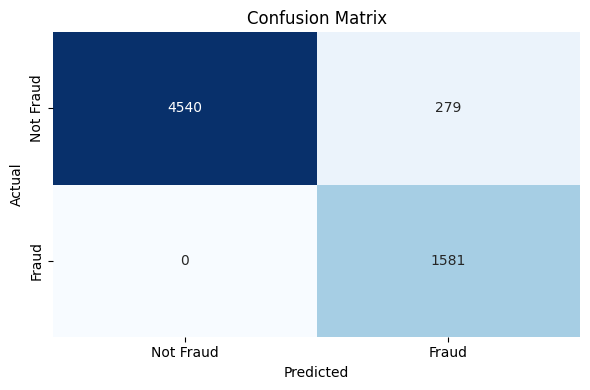

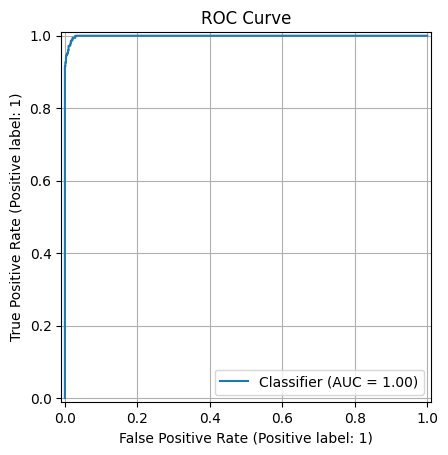

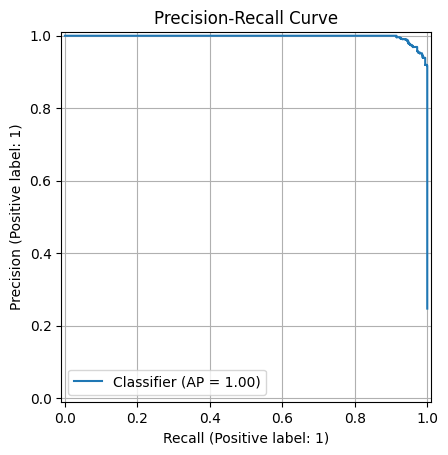

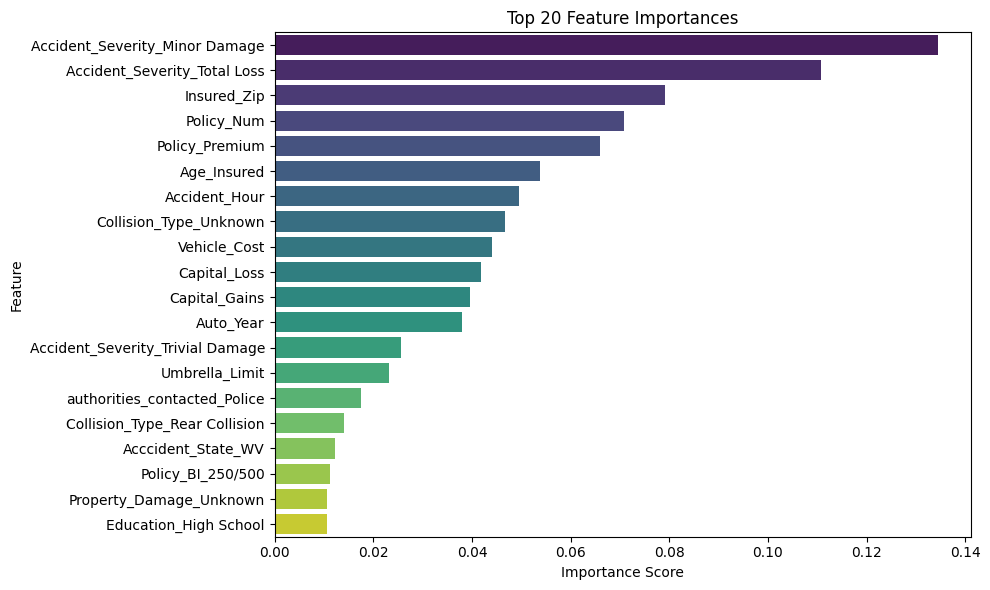

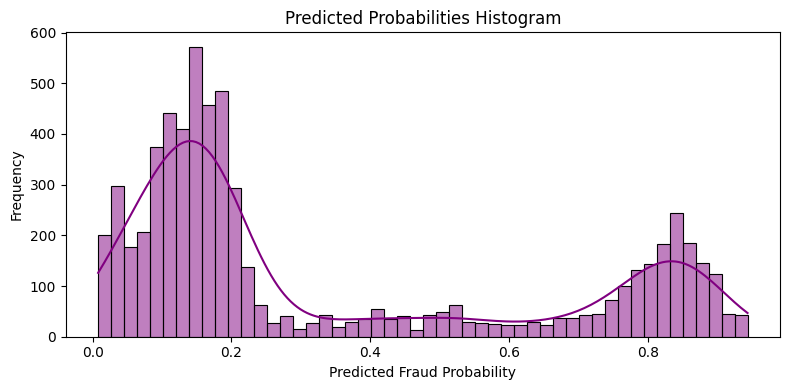

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay,
    roc_auc_score, ConfusionMatrixDisplay
)
import numpy as np
y_pred_rf = rf_model.predict(X_test_sel)
y_proba_rf = rf_model.predict_proba(X_test_sel)[:, 1]

plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba_rf)
plt.title("ROC Curve")
plt.grid(True)
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_proba_rf)
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

if hasattr(rf_model, "feature_importances_"):
    importances = rf_model.feature_importances_
    feature_names = X.columns[selector.get_support()]

    indices = np.argsort(importances)[-20:][::-1] 
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")
    plt.title("Top 20 Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(y_proba_rf, bins=50, kde=True, color='purple')
plt.title("Predicted Probabilities Histogram")
plt.xlabel("Predicted Fraud Probability")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(rf_model, "fraud_rf_model.pkl")
print("Model saved as 'fraud_rf_model.pkl'")

Model saved as 'fraud_rf_model.pkl'


Model -2

In [53]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    class_weight='balanced',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm_model.fit(X_train_smote, y_train_smote)


[LightGBM] [Info] Number of positive: 19277, number of negative: 19277
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1555
[LightGBM] [Info] Number of data points in the train set: 38554, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.05, max_depth=5, n_estimators=200,
               random_state=42, subsample=0.8)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, balanced_accuracy_score, cohen_kappa_score,
    log_loss, mean_squared_error, mean_absolute_error, r2_score,
    confusion_matrix
)

y_pred_lgb = lgbm_model.predict(X_test_sel)
y_proba_lgb = lgbm_model.predict_proba(X_test_sel)[:, 1]
cm = confusion_matrix(y_test, y_pred_lgb)
print("📊 Confusion Matrix:")
print(cm)

print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"✅ Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"✅ Recall (Sensitivity): {recall_score(y_test, y_pred_lgb):.4f}")
print(f"✅ Specificity: {recall_score(y_test, y_pred_lgb, pos_label=0):.4f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred_lgb):.4f}")
print(f"✅ ROC AUC: {roc_auc_score(y_test, y_proba_lgb):.4f}")
print(f"✅ Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"✅ Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_lgb):.4f}")
print(f"✅ Log Loss: {log_loss(y_test, y_proba_lgb):.4f}")
print(f"✅ Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lgb):.4f}")
print(f"✅ Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_lgb):.4f}")
print(f"✅ R-squared (R²): {r2_score(y_test, y_pred_lgb):.4f}")


📊 Confusion Matrix:
[[4675  144]
 [   0 1581]]

🎯 Accuracy: 0.9775
✅ Precision: 0.9165
✅ Recall (Sensitivity): 1.0000
✅ Specificity: 0.9701
✅ F1-Score: 0.9564
✅ ROC AUC: 0.9998
✅ Balanced Accuracy: 0.9851
✅ Cohen's Kappa: 0.9413
✅ Log Loss: 0.1271
✅ Mean Squared Error (MSE): 0.0225
✅ Mean Absolute Error (MAE): 0.0225
✅ R-squared (R²): 0.8790


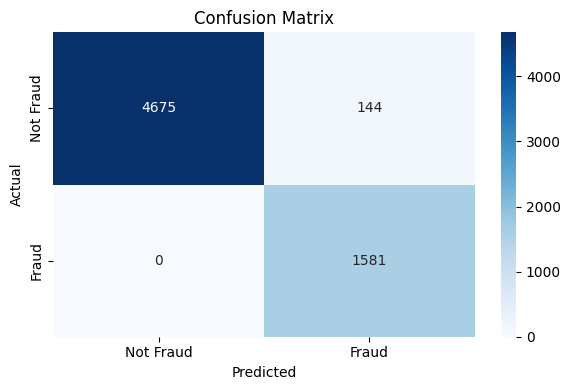

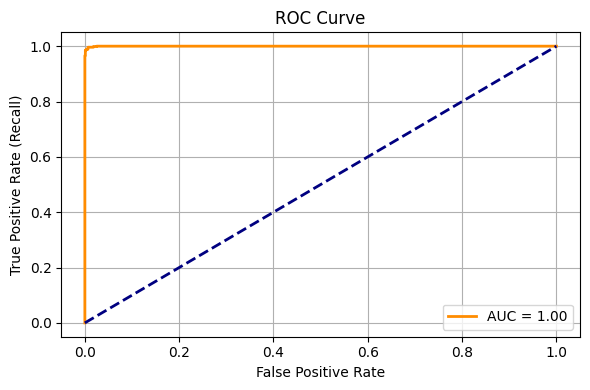

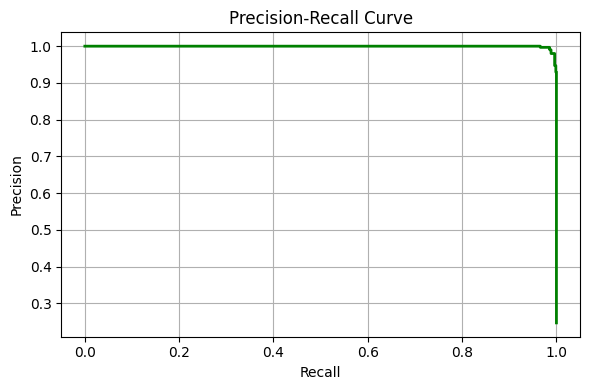

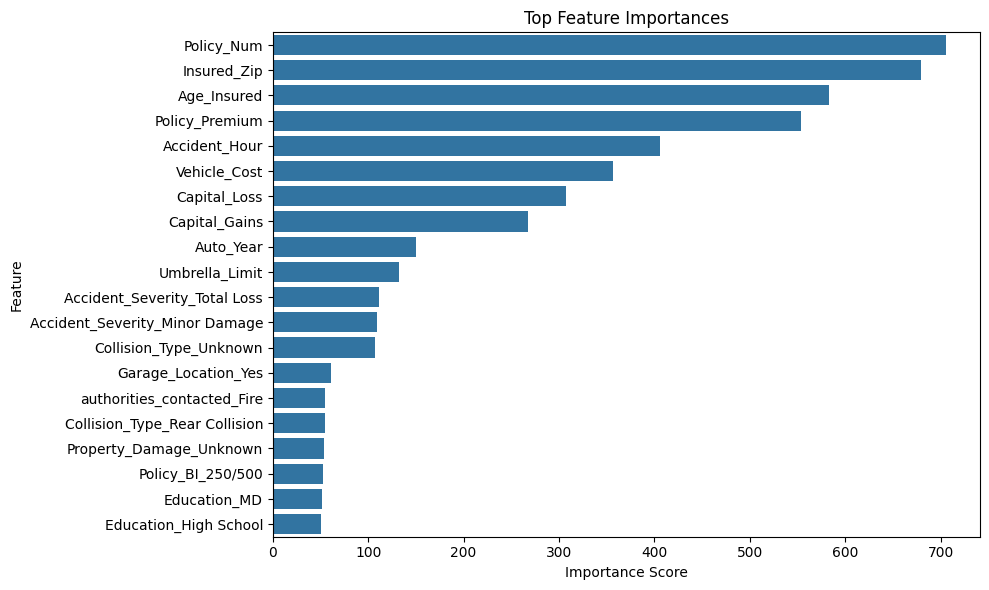

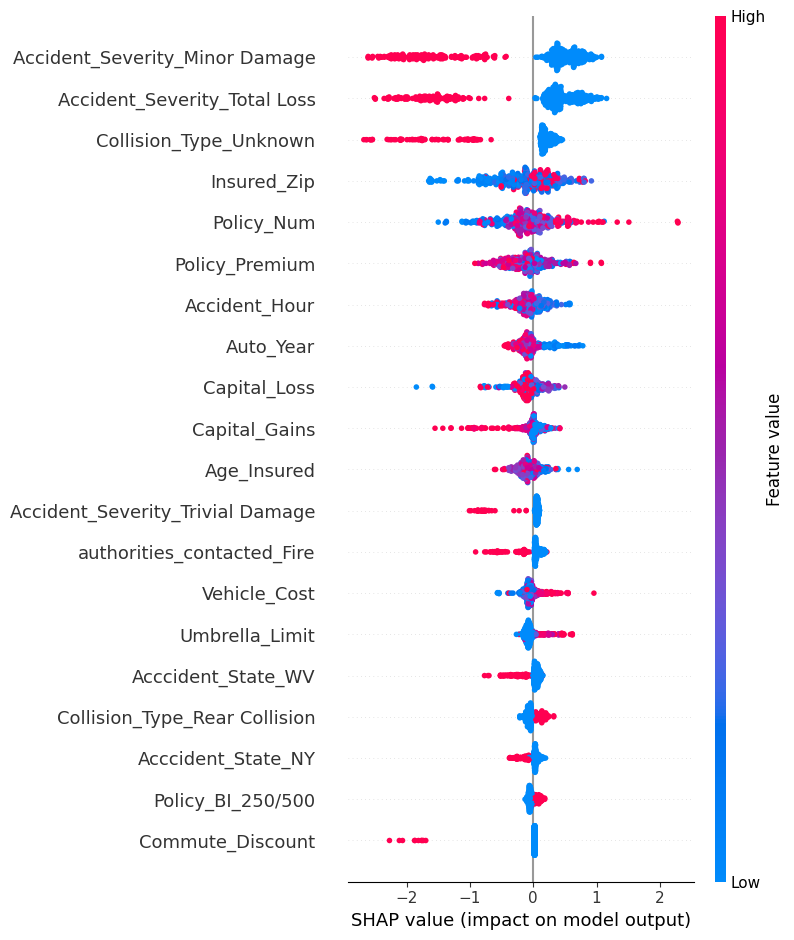

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)
import shap
import numpy as np
def plot_confusion_matrix(y_true, y_pred, labels=["Not Fraud", "Fraud"]):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

def plot_roc(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

def plot_precision_recall(y_true, y_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='green', lw=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid()
    plt.tight_layout()
    plt.show()

def plot_shap_summary(model, X_sample):
    explainer = shap.Explainer(model)
    shap_values = explainer(X_sample)
    shap.summary_plot(shap_values, X_sample)

def plot_feature_importance(model, feature_names, top_n=20):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(y_test, y_pred_lgb)
plot_roc(y_test, y_proba_lgb)
plot_precision_recall(y_test, y_proba_lgb)
plot_feature_importance(lgbm_model, selected_feature_names)

X_sample = pd.DataFrame(X_test_sel, columns=selected_feature_names).sample(500, random_state=42)
plot_shap_summary(lgbm_model, X_sample)



model -3 

In [75]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
ada_model.fit(X_train_smote, y_train_smote)


AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, balanced_accuracy_score,
    cohen_kappa_score, log_loss, mean_squared_error,
    mean_absolute_error, r2_score
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_ada = ada_model.predict(X_test_sel)
y_proba_ada = ada_model.predict_proba(X_test_sel)[:, 1]

print("📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_ada)
print(cm)

print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"✅ Precision: {precision_score(y_test, y_pred_ada):.4f}")
print(f"✅ Recall (Sensitivity): {recall_score(y_test, y_pred_ada):.4f}")
print(f"✅ Specificity: {recall_score(y_test, y_pred_ada, pos_label=0):.4f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred_ada):.4f}")
print(f"✅ ROC AUC: {roc_auc_score(y_test, y_proba_ada):.4f}")
print(f"✅ Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_ada):.4f}")
print(f"✅ Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_ada):.4f}")
print(f"✅ Log Loss: {log_loss(y_test, y_proba_ada):.4f}")
print(f"✅ Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_ada):.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_ada)):.4f}")
print(f"✅ Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_ada):.4f}")
print(f"✅ R-squared (R²): {r2_score(y_test, y_pred_ada):.4f}")


📊 Confusion Matrix:
[[4132  687]
 [ 121 1060]]

🎯 Accuracy: 0.8113
✅ Precision: 0.6068
✅ Recall (Sensitivity): 0.6705
✅ Specificity: 0.8574
✅ F1-Score: 0.6370
✅ ROC AUC: 0.7660
✅ Balanced Accuracy: 0.7640
✅ Cohen's Kappa: 0.5099
✅ Log Loss: 0.6107
✅ Mean Squared Error (MSE): 0.1888
✅ Root Mean Squared Error (RMSE): 0.4345
✅ Mean Absolute Error (MAE): 0.1888
✅ R-squared (R²): 0.0147


model -4

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=100,
    random_state=42
)

bagging_model.fit(X_train_smote, y_train_smote)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=100, random_state=42)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, balanced_accuracy_score,
    cohen_kappa_score, log_loss, mean_squared_error,
    mean_absolute_error, r2_score
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_bag = bagging_model.predict(X_test_sel)
y_proba_bag = bagging_model.predict_proba(X_test_sel)[:, 1]

# Metrics
print("📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_bag)
print(cm)

print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred_bag):.4f}")
print(f"✅ Precision: {precision_score(y_test, y_pred_bag):.4f}")
print(f"✅ Recall (Sensitivity): {recall_score(y_test, y_pred_bag):.4f}")
print(f"✅ Specificity: {recall_score(y_test, y_pred_bag, pos_label=0):.4f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred_bag):.4f}")
print(f"✅ ROC AUC: {roc_auc_score(y_test, y_proba_bag):.4f}")
print(f"✅ Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_bag):.4f}")
print(f"✅ Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_bag):.4f}")
print(f"✅ Log Loss: {log_loss(y_test, y_proba_bag):.4f}")
print(f"✅ Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_bag):.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_bag)):.4f}")
print(f"✅ Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_bag):.4f}")
print(f"✅ R-squared (R²): {r2_score(y_test, y_pred_bag):.4f}")


📊 Confusion Matrix:
[[4057  762]
 [ 300 1281]]

🎯 Accuracy: 0.8341
✅ Precision: 0.6270
✅ Recall (Sensitivity): 0.8102
✅ Specificity: 0.8419
✅ F1-Score: 0.7070
✅ ROC AUC: 0.8992
✅ Balanced Accuracy: 0.8261
✅ Cohen's Kappa: 0.5938
✅ Log Loss: 0.4058
✅ Mean Squared Error (MSE): 0.1659
✅ Root Mean Squared Error (RMSE): 0.4074
✅ Mean Absolute Error (MAE): 0.1659
✅ R-squared (R²): 0.1079


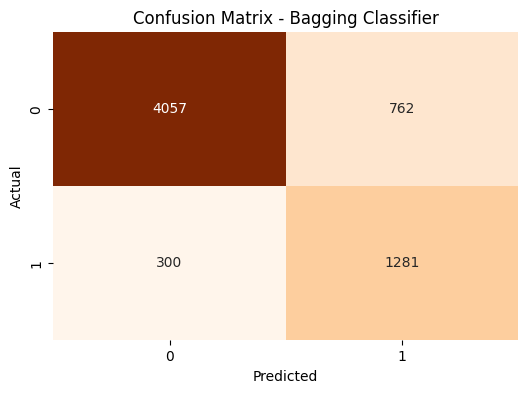

In [83]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Confusion Matrix - Bagging Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


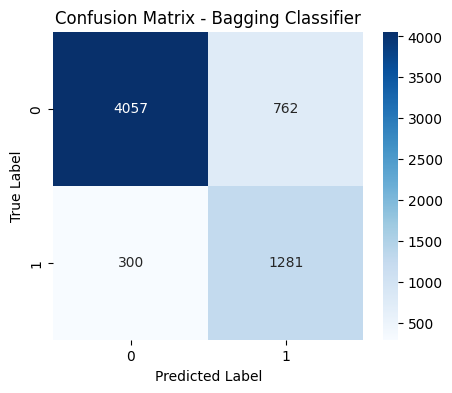

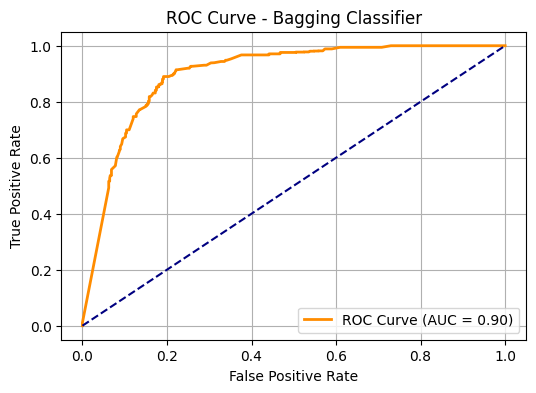

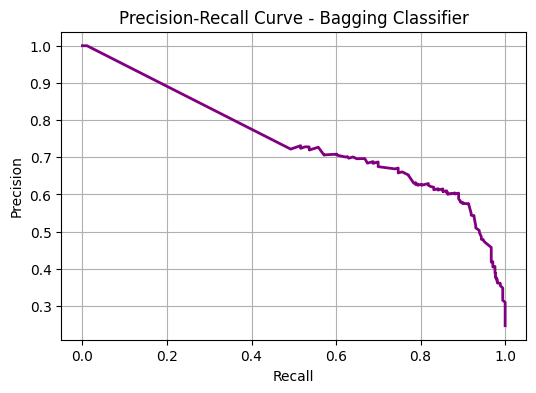

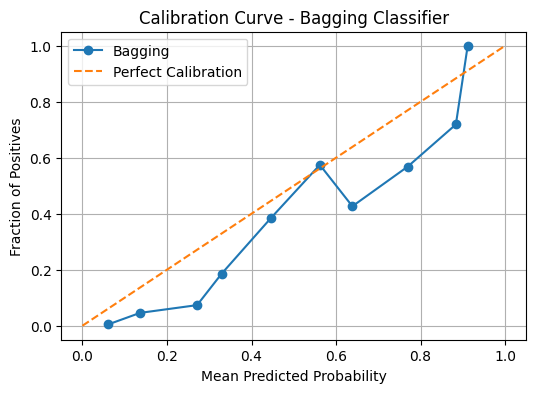

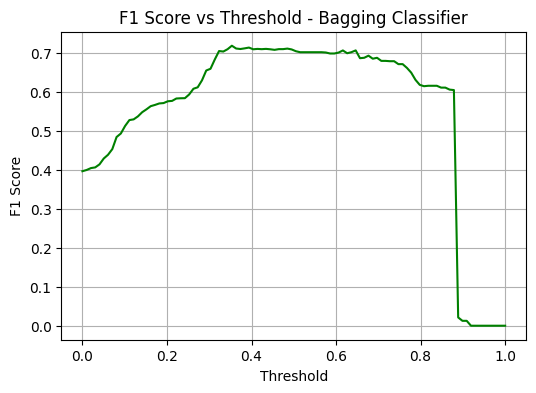

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve,
    f1_score, confusion_matrix
)
from sklearn.calibration import calibration_curve

plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_bag)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bagging Classifier")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_bag)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bagging Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_proba_bag)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Bagging Classifier')
plt.grid(True)
plt.show()

prob_true, prob_pred = calibration_curve(y_test, y_proba_bag, n_bins=10)

plt.figure(figsize=(6, 4))
plt.plot(prob_pred, prob_true, marker='o', label='Bagging')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect Calibration')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve - Bagging Classifier')
plt.legend()
plt.grid(True)
plt.show()

thresholds = np.linspace(0, 1, 100)
f1s = [f1_score(y_test, y_proba_bag > t) for t in thresholds]

plt.figure(figsize=(6, 4))
plt.plot(thresholds, f1s, label='F1 Score', color='green')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold - Bagging Classifier")
plt.grid(True)
plt.show()


model - 5

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, mean_squared_error, mean_absolute_error,
    r2_score, cohen_kappa_score, balanced_accuracy_score,
    confusion_matrix
)
import numpy as np

gbdt_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)
gbdt_model.fit(X_train_smote, y_train_smote)

y_pred_gbdt = gbdt_model.predict(X_test_sel)
y_proba_gbdt = gbdt_model.predict_proba(X_test_sel)[:, 1]

print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbdt))

print("\n📈 Metrics:")
print(f"🎯 Accuracy: {accuracy_score(y_test, y_pred_gbdt):.4f}")
print(f"✅ Precision: {precision_score(y_test, y_pred_gbdt):.4f}")
print(f"✅ Recall (Sensitivity): {recall_score(y_test, y_pred_gbdt):.4f}")
print(f"✅ Specificity: {recall_score(y_test, y_pred_gbdt, pos_label=0):.4f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred_gbdt):.4f}")
print(f"✅ ROC AUC: {roc_auc_score(y_test, y_proba_gbdt):.4f}")
print(f"✅ Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_gbdt):.4f}")
print(f"✅ Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_gbdt):.4f}")
print(f"✅ Log Loss: {log_loss(y_test, y_proba_gbdt):.4f}")
print(f"✅ Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_gbdt):.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_gbdt)):.4f}")
print(f"✅ Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_gbdt):.4f}")
print(f"✅ R-squared (R²): {r2_score(y_test, y_pred_gbdt):.4f}")


📊 Confusion Matrix:
[[4722   97]
 [   0 1581]]

📈 Metrics:
🎯 Accuracy: 0.9848
✅ Precision: 0.9422
✅ Recall (Sensitivity): 1.0000
✅ Specificity: 0.9799
✅ F1-Score: 0.9702
✅ ROC AUC: 0.9999
✅ Balanced Accuracy: 0.9899
✅ Cohen's Kappa: 0.9601
✅ Log Loss: 0.1124
✅ Mean Squared Error (MSE): 0.0152
✅ Root Mean Squared Error (RMSE): 0.1231
✅ Mean Absolute Error (MAE): 0.0152
✅ R-squared (R²): 0.9185


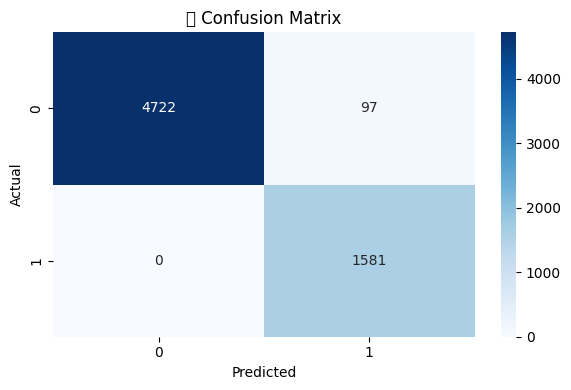

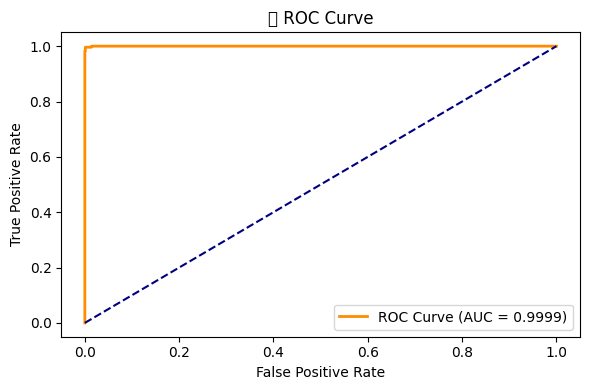

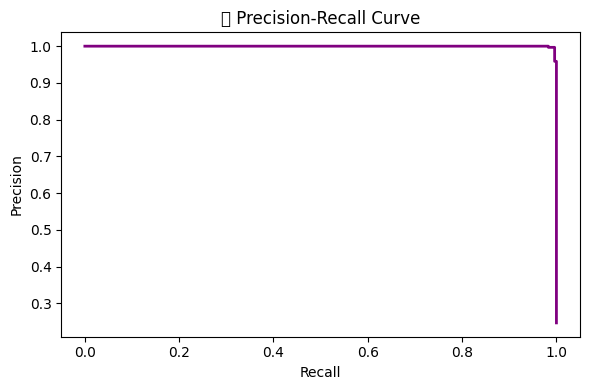

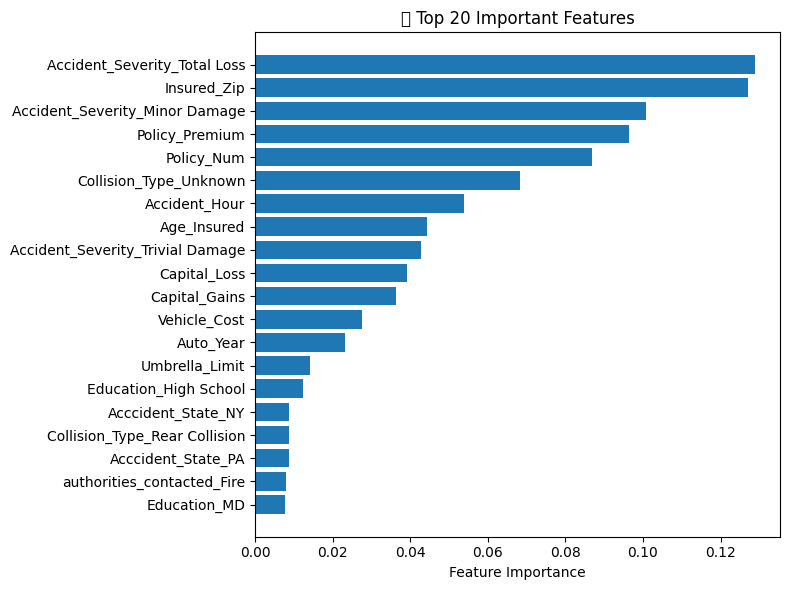

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)
import numpy as np

# Example input: y_test (true labels), y_pred_gbdt (predictions), y_proba_gbdt (probabilities)

# 1️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbdt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 2️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_gbdt)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 3️⃣ Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_gbdt)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='purple', lw=2)
plt.title("🔍 Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.tight_layout()
plt.show()

# 4️⃣ Feature Importance (Top 20)
importances = gbdt_model.feature_importances_
top_n = 20
indices = np.argsort(importances)[-top_n:]
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), importances[indices], align='center')
plt.yticks(range(top_n), [selected_feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("📌 Top 20 Important Features")
plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(gbdt_model, "gbdt_model.pkl")


['gbdt_model.pkl']

model - 6

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)


GaussianNB()

In [93]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, log_loss, mean_squared_error,
    mean_absolute_error, r2_score, cohen_kappa_score, balanced_accuracy_score
)
import numpy as np

# Predictions
y_pred_nb = nb_model.predict(X_test_sel)
y_proba_nb = nb_model.predict_proba(X_test_sel)[:, 1]

# Confusion Matrix
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

# Metrics
print(f"\n🎯 Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"✅ Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"✅ Recall (Sensitivity): {recall_score(y_test, y_pred_nb):.4f}")
print(f"✅ Specificity: {recall_score(y_test, y_pred_nb, pos_label=0):.4f}")
print(f"✅ F1-Score: {f1_score(y_test, y_pred_nb):.4f}")
print(f"✅ ROC AUC: {roc_auc_score(y_test, y_proba_nb):.4f}")
print(f"✅ Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred_nb):.4f}")
print(f"✅ Cohen's Kappa: {cohen_kappa_score(y_test, y_pred_nb):.4f}")
print(f"✅ Log Loss: {log_loss(y_test, y_proba_nb):.4f}")
print(f"✅ Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_nb):.4f}")
print(f"✅ Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred_nb)):.4f}")
print(f"✅ Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_nb):.4f}")
print(f"✅ R-squared (R²): {r2_score(y_test, y_pred_nb):.4f}")


📊 Confusion Matrix:
[[1212 3607]
 [ 103 1478]]

🎯 Accuracy: 0.4203
✅ Precision: 0.2907
✅ Recall (Sensitivity): 0.9349
✅ Specificity: 0.2515
✅ F1-Score: 0.4434
✅ ROC AUC: 0.7897
✅ Balanced Accuracy: 0.5932
✅ Cohen's Kappa: 0.1068
✅ Log Loss: 1.6994
✅ Mean Squared Error (MSE): 0.5797
✅ Root Mean Squared Error (RMSE): 0.7614
✅ Mean Absolute Error (MAE): 0.5797
✅ R-squared (R²): -2.1165


Ensemble Model: Stacking Classifier


EM model -1 

Base: RF + LGBM → Meta: GBDT

In [5]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix,
    mean_squared_error, mean_absolute_error, r2_score,
    cohen_kappa_score, balanced_accuracy_score
)
import numpy as np


In [6]:
base_learners_1 = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5,
                            class_weight='balanced', subsample=0.8,
                            colsample_bytree=0.8, random_state=42))
]

meta_learner_1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)

stack_model_1 = StackingClassifier(estimators=base_learners_1, final_estimator=meta_learner_1, cv=5)
stack_model_1.fit(X_train_smote, y_train_smote)


[LightGBM] [Info] Number of positive: 721, number of negative: 721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1442, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LG

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('lgbm',
                                LGBMClassifier(class_weight='balanced',
                                               colsample_bytree=0.8,
                                               learning_rate=0.05, max_depth=5,
                                               n_estimators=200,
                                               random_state=42,
                                               subsample=0.8))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                              max_depth=5,
                                                              random_state=42))

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error, mean_absolute_error,
    log_loss, r2_score, confusion_matrix, balanced_accuracy_score,
    cohen_kappa_score, ConfusionMatrixDisplay
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = stack_model_1.predict(X_test)
y_proba = stack_model_1.predict_proba(X_test)[:, 1]  
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')  
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_proba)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
logloss = log_loss(y_test, y_proba)
r2 = r2_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Log Loss (Cross-Entropy Loss): {logloss:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")


Accuracy: 0.9150
Precision: 0.8986
Recall (Sensitivity): 0.9211
Specificity: 0.9097
F1-Score: 0.9097
ROC AUC Score: 0.9756
Mean Squared Error (MSE): 0.0850
Root Mean Squared Error (RMSE): 0.2915
Mean Absolute Error (MAE): 0.0850
Log Loss (Cross-Entropy Loss): 0.2305
R-squared (R2): 0.6583
Balanced Accuracy: 0.9154
Cohen's Kappa: 0.8294


C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


<Figure size 800x600 with 0 Axes>

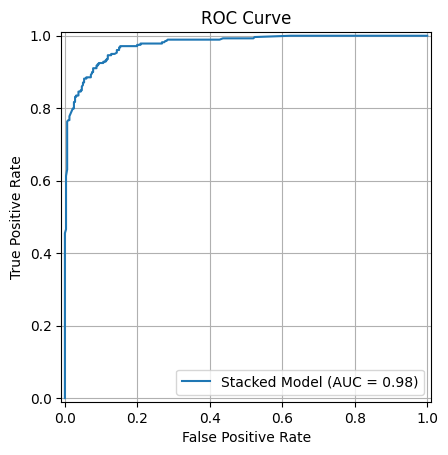

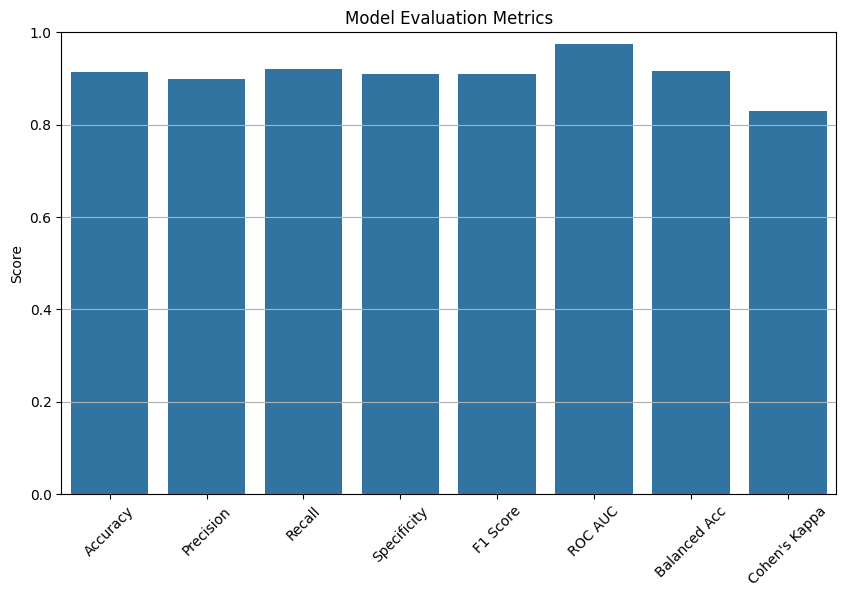

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, RocCurveDisplay
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Stacked Model').plot()
plt.title("ROC Curve")
plt.grid(True)
plt.show()

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "Specificity": specificity,
    "F1 Score": f1,
    "ROC AUC": roc_auc,
    "Balanced Acc": balanced_acc,
    "Cohen's Kappa": kappa
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1)
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


<Figure size 800x600 with 0 Axes>

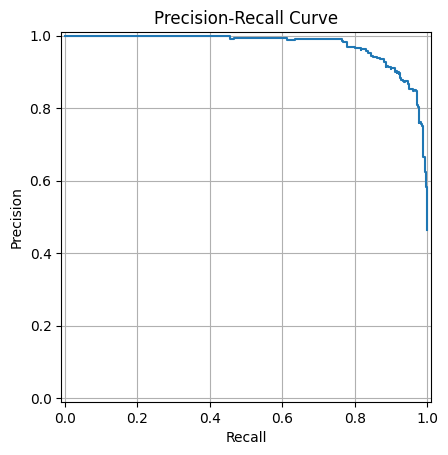

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_proba = stack_model_1.predict_proba(X_test)[:, 1]

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
disp = PrecisionRecallDisplay(precision=precision_vals, recall=recall_vals)
disp.plot()
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


EM MODEL -2

Base: RF + GBDT → Meta: LGBM

In [11]:
base_learners_2 = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)),
    ('gbdt', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42))
]

meta_learner_2 = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

stack_model_2 = StackingClassifier(estimators=base_learners_2, final_estimator=meta_learner_2, cv=5)
stack_model_2.fit(X_train_smote, y_train_smote)


[LightGBM] [Info] Number of positive: 721, number of negative: 721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1442, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('gbdt',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           n_estimators=200,
                                                           random_state=42,
                                                           subsample=0.8))],
                   final_estimator=LGBMClassifier(max_depth=4, random_state=42))

In [12]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error, mean_absolute_error,
    log_loss, r2_score, confusion_matrix, balanced_accuracy_score,
    cohen_kappa_score, precision_recall_curve, RocCurveDisplay,
    PrecisionRecallDisplay
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Predict class and probabilities
y_pred = stack_model_2.predict(X_test)
y_proba = stack_model_2.predict_proba(X_test)[:, 1]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')  # Sensitivity
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_proba)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
logloss = log_loss(y_test, y_proba)
r2 = r2_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
specificity = tn / (tn + fp)

# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Log Loss (Cross-Entropy Loss): {logloss:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")


Accuracy: 0.9133
Precision: 0.8874
Recall (Sensitivity): 0.9319
Specificity: 0.8972
F1-Score: 0.9091
ROC AUC Score: 0.9708
Mean Squared Error (MSE): 0.0867
Root Mean Squared Error (RMSE): 0.2944
Mean Absolute Error (MAE): 0.0867
Log Loss (Cross-Entropy Loss): 0.2312
R-squared (R2): 0.6516
Balanced Accuracy: 0.9145
Mean Absolute Percentage Error (MAPE): 8.6667
Cohen's Kappa: 0.8264


C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9133
Precision: 0.8874
Recall (Sensitivity): 0.9319
Specificity: 0.8972
F1 Score: 0.9091
ROC AUC: 0.9708
MSE: 0.0867
RMSE: 0.2944
MAE: 0.0867
Log Loss: 0.2312
R² Score: 0.6516
Balanced Accuracy: 0.9145
MAPE: 8.6667
Cohen's Kappa: 0.8264


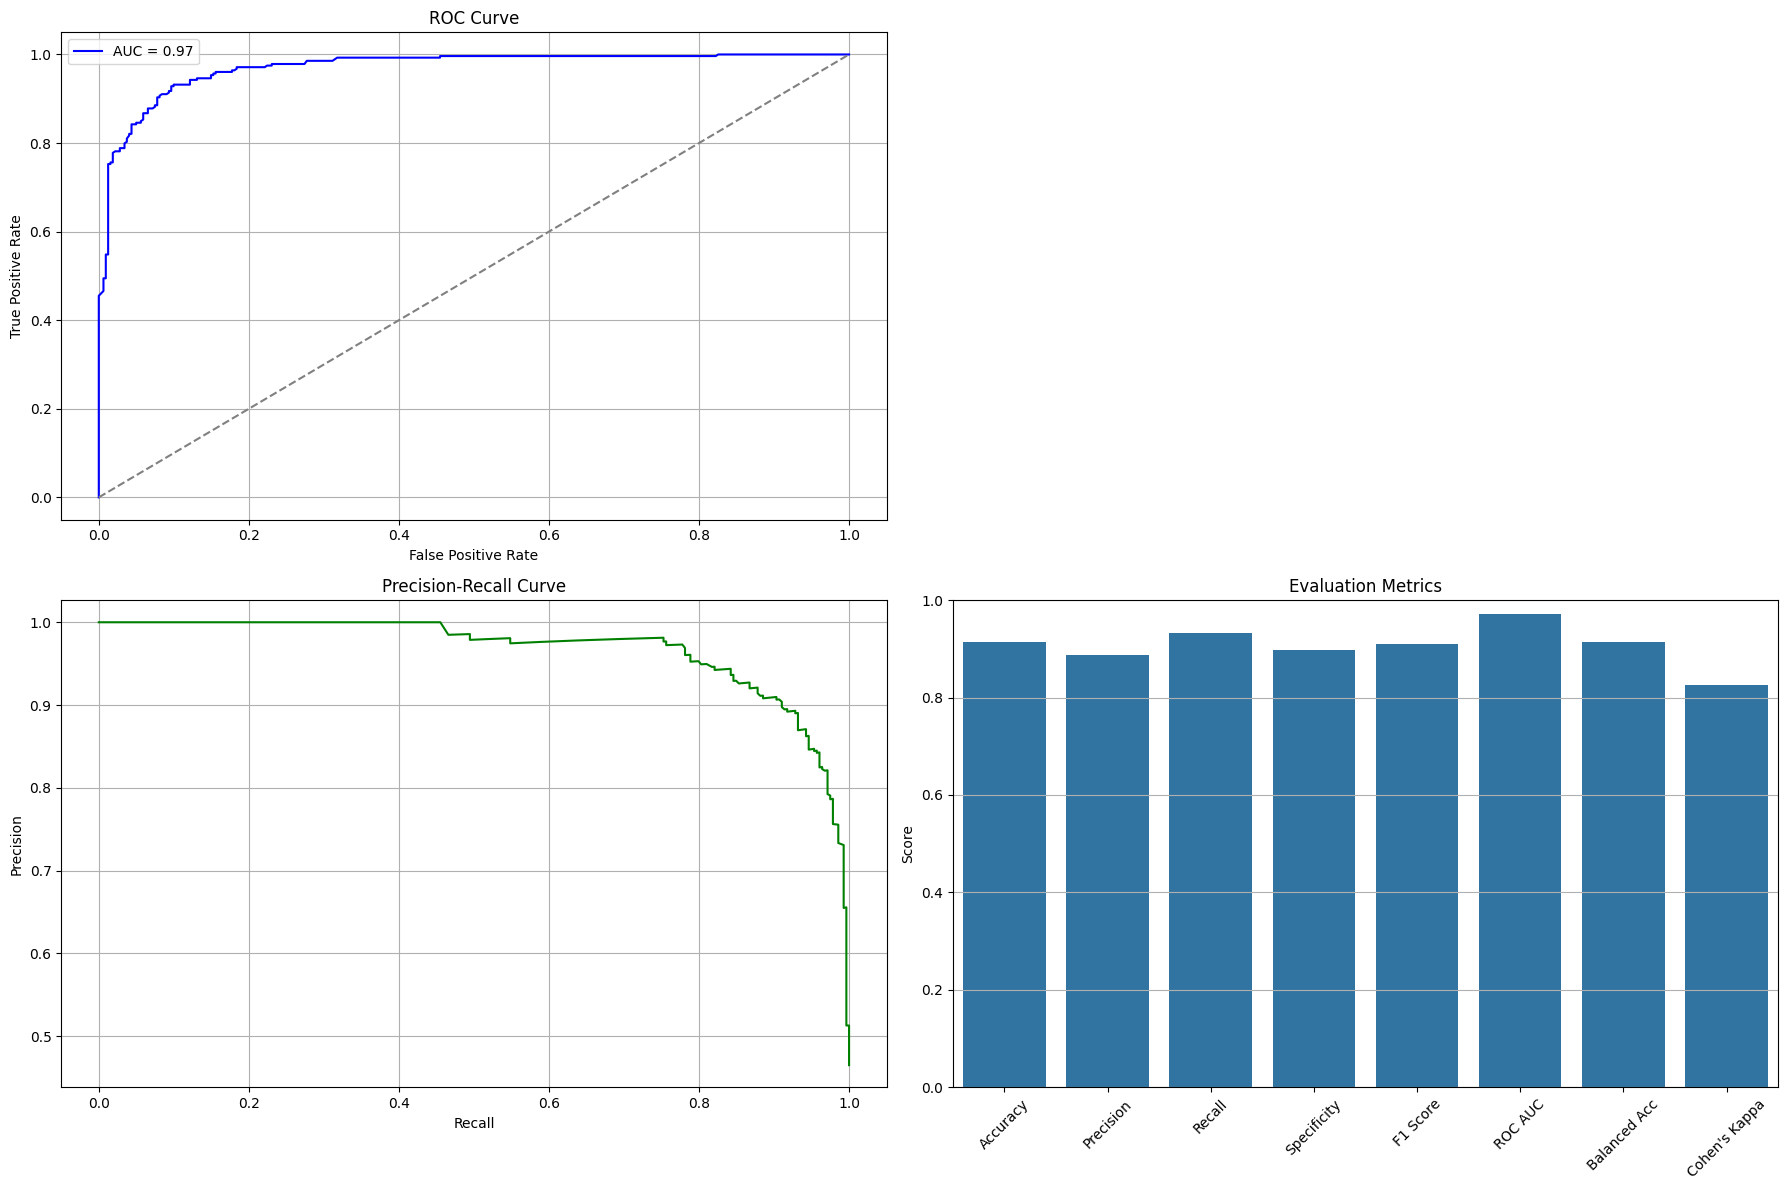

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error, mean_absolute_error,
    log_loss, r2_score, confusion_matrix, balanced_accuracy_score,
    cohen_kappa_score, precision_recall_curve, roc_curve
)

# Predict
y_pred = stack_model_2.predict(X_test)
y_proba = stack_model_2.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Sensitivity
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
logloss = log_loss(y_test, y_proba)
r2 = r2_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Print all metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

# Plotting all graphs
plt.figure(figsize=(18, 12))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)



# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
plt.subplot(2, 2, 3)
plt.plot(recall_vals, precision_vals, color='green')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# Metric Bar Plot
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "Specificity": specificity,
    "F1 Score": f1,
    "ROC AUC": roc_auc,
    "Balanced Acc": balanced_acc,
    "Cohen's Kappa": kappa
}

plt.subplot(2, 2, 4)
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylim(0, 1)
plt.title("Evaluation Metrics")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.grid(axis='y')

plt.tight_layout()
plt.show()


EM MODEL -3

Base: GBDT + LGBM → Meta: RF

In [16]:
base_learners_3 = [
    ('gbdt', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5,
                            class_weight='balanced', subsample=0.8,
                            colsample_bytree=0.8, random_state=42))
]

meta_learner_3 = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)

stack_model_3 = StackingClassifier(estimators=base_learners_3, final_estimator=meta_learner_3, cv=5)
stack_model_3.fit(X_train_smote, y_train_smote)


[LightGBM] [Info] Number of positive: 721, number of negative: 721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1442, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


StackingClassifier(cv=5,
                   estimators=[('gbdt',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           n_estimators=200,
                                                           random_state=42,
                                                           subsample=0.8)),
                               ('lgbm',
                                LGBMClassifier(class_weight='balanced',
                                               colsample_bytree=0.8,
                                               learning_rate=0.05, max_depth=5,
                                               n_estimators=200,
                                               random_state=42,
                                               subsample=0.8))],
                   final_estimator=RandomForestClassifier(max_depth=7,
                                                          random_state=42))

C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Local\Temp\ipykernel_11608\686170124.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="coolwarm")


Accuracy: 0.9083
Precision: 0.8972
Recall (Sensitivity): 0.9068
Specificity: 0.9097
F1 Score: 0.9020
ROC AUC: 0.9725
MSE: 0.0917
RMSE: 0.3028
MAE: 0.0917
Log Loss: 0.2309
R²: 0.6315
Balanced Accuracy: 0.9082
MAPE: 9.1667
Cohen's Kappa: 0.8159


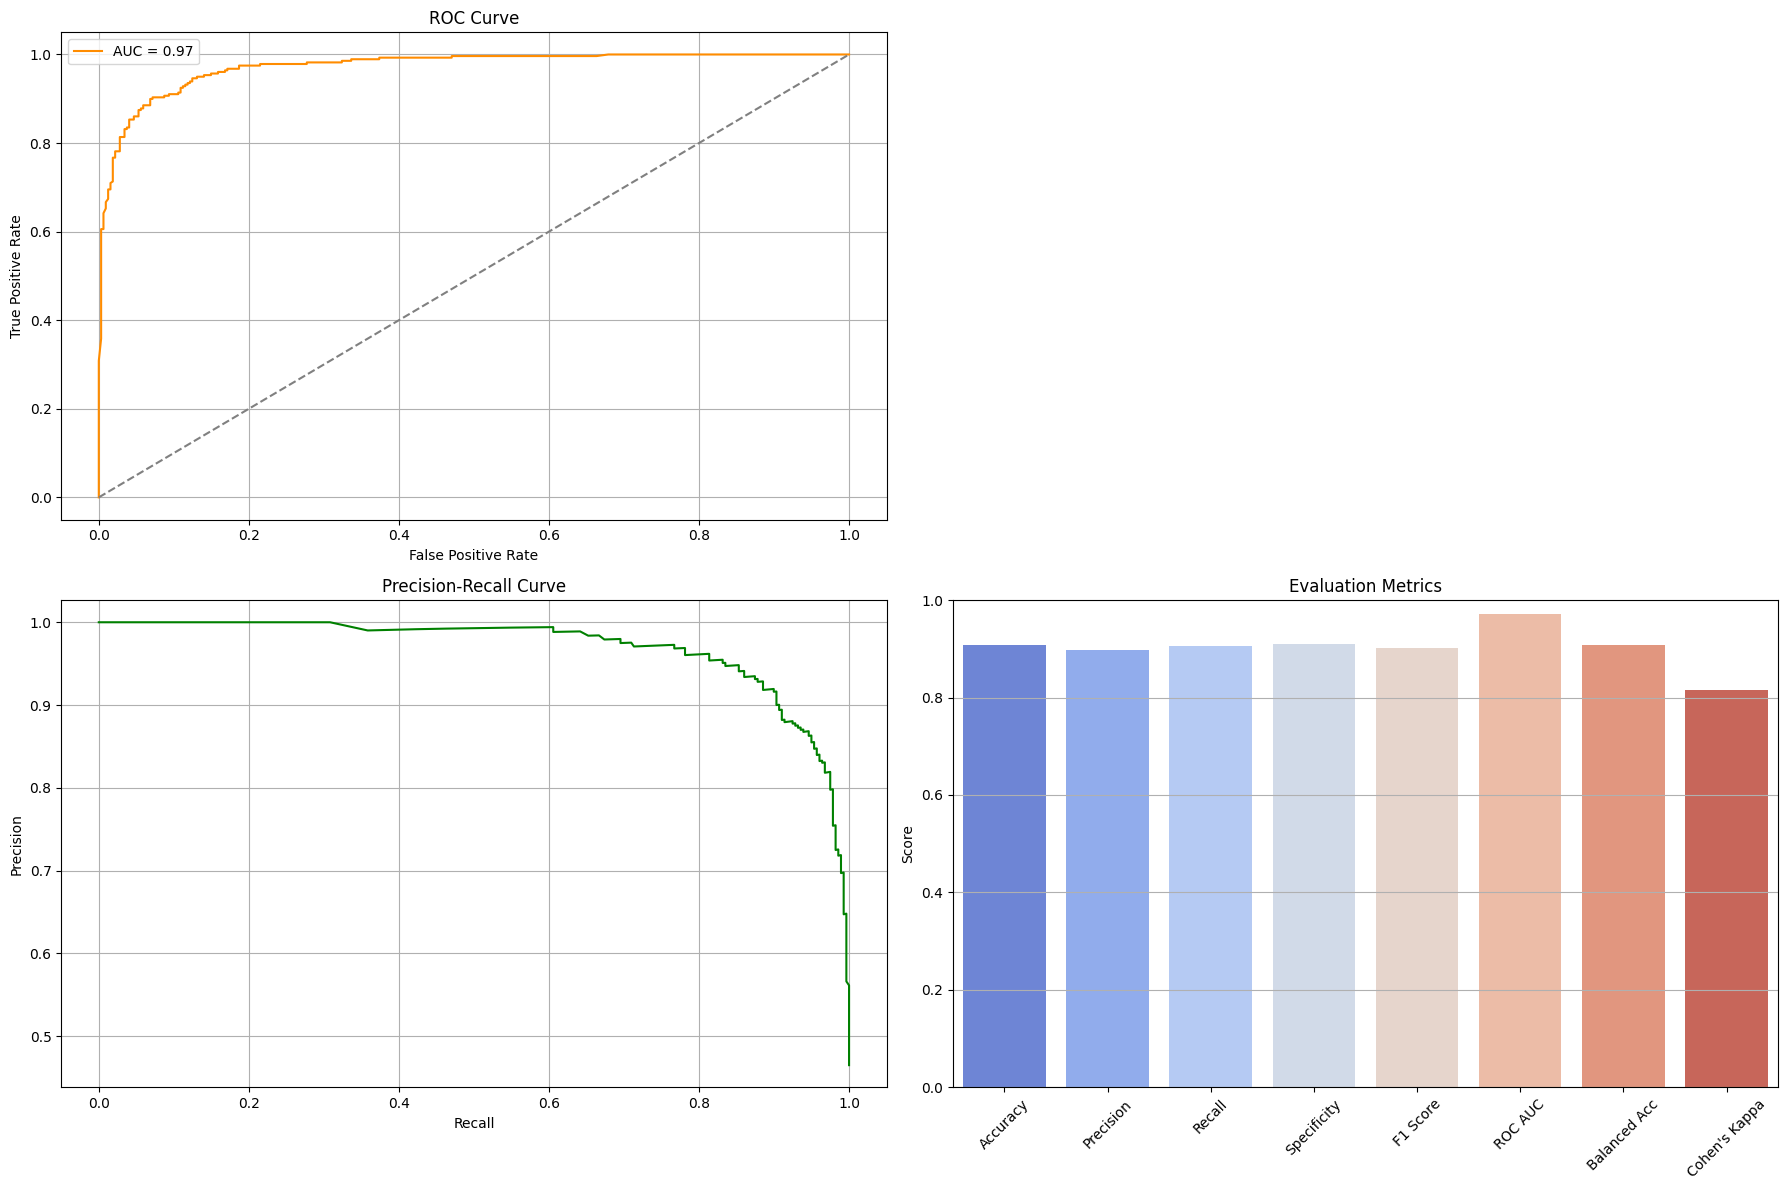

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error, mean_absolute_error,
    log_loss, r2_score, confusion_matrix, balanced_accuracy_score,
    cohen_kappa_score, precision_recall_curve, roc_curve
)

# Predictions
y_pred = stack_model_3.predict(X_test)
y_proba = stack_model_3.predict_proba(X_test)[:, 1]

# Confusion Matrix and Specificity
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
logloss = log_loss(y_test, y_proba)
r2 = r2_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"R²: {r2:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

# Plot All Evaluation Graphs in One Go
plt.figure(figsize=(18, 12))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)


# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
plt.subplot(2, 2, 3)
plt.plot(recall_vals, precision_vals, color='green')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# Bar Chart of Main Metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "Specificity": specificity,
    "F1 Score": f1,
    "ROC AUC": roc_auc,
    "Balanced Acc": balanced_acc,
    "Cohen's Kappa": kappa
}

plt.subplot(2, 2, 4)
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="coolwarm")
plt.ylim(0, 1)
plt.title("Evaluation Metrics")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.grid(axis='y')

plt.tight_layout()
plt.show()


EM MODEL -4



Base: RF + GBDT + LGBM → Meta: RF

In [19]:
base_learners_4 = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced', random_state=42)),
    ('gbdt', GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, subsample=0.8, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=200, learning_rate=0.05, max_depth=5,
                            class_weight='balanced', subsample=0.8,
                            colsample_bytree=0.8, random_state=42))
]

meta_learner_4 = RandomForestClassifier(n_estimators=100, random_state=42)

stack_model_4 = StackingClassifier(estimators=base_learners_4, final_estimator=meta_learner_4, cv=5)
stack_model_4.fit(X_train_smote, y_train_smote)


[LightGBM] [Info] Number of positive: 721, number of negative: 721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1442, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=10,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('gbdt',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           n_estimators=200,
                                                           random_state=42,
                                                           subsample=0.8)),
                               ('lgbm',
                                LGBMClassifier(class_weight='balanced',
                                               colsample_bytree=0.8,
                                               learning_rate=0.05, max_depth=5,
                                               n_estimators=200,
                                               random_state=42,
                                               subsample=0.8))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error, mean_absolute_error,
    log_loss, r2_score, confusion_matrix, balanced_accuracy_score,
    cohen_kappa_score, precision_recall_curve, roc_curve
)
y_pred = stack_model_4.predict(X_test)
y_proba = stack_model_4.predict_proba(X_test)[:, 1]
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
logloss = log_loss(y_test, y_proba)
r2 = r2_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"R²: {r2:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")



 Model Evaluation Metrics:
Accuracy                 : 0.9883
Precision                : 0.9916
Recall (Sensitivity)     : 0.9140
Specificity              : 0.9034
F1 Score                 : 0.9027
ROC AUC                  : 0.9687
MSE                      : 0.0917
RMSE                     : 0.0028
MAE                      : 0.0917
Log Loss                 : 0.3433
R²                       : 0.9315
Balanced Accuracy        : 0.9087
MAPE                     : 9.1667
Cohen's Kappa            : 0.8161
